<h1>Исследование объявлений о продаже квартир</h1>

<h2>Описание и цели проекта</h2>

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h2>Описание данных</h2>

Файл с данными _/datasets/real_estate_data.csv_ содержит необходимую информацию:

* _airports_nearest_ — расстояние до ближайшего аэропорта в метрах (м)
* _balcony_ — число балконов
* _ceiling_height_ — высота потолков (м)
* _cityCenters_nearest_ — расстояние до центра города (м)
* _days_exposition_ — сколько дней было размещено объявление (от публикации до снятия)
* _first_day_exposition_ — дата публикации
* _floor_ — этаж
* _floors_total_ — всего этажей в доме
* _is_apartment_ — апартаменты (булев тип)
* _kitchen_area_ — площадь кухни в квадратных метрах (м²)
* _last_price_ — цена на момент снятия с публикации
* _living_area_ — жилая площадь в квадратных метрах(м²)
* _locality_name_ — название населённого пункта
* _open_plan_ — свободная планировка (булев тип)
* _parks_around3000_ — число парков в радиусе 3 км
* _parks_nearest_ — расстояние до ближайшего парка (м)
* _ponds_around3000_ — число водоёмов в радиусе 3 км
* _ponds_nearest_ — расстояние до ближайшего водоёма (м)
* _rooms_ — число комнат
* _studio_ — квартира-студия (булев тип)
* _total_area_ — площадь квартиры в квадратных метрах (м²)
* _total_images_ — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

<h2>Оглавление</h2>

1. [Открытие данных](#step_1)
2. [Предобработка данных](#step_2)
    - Порядок столбцов и название столбцов
    - Обработка пропусков
    - Замена типа данных
3. [Добавление новых столбцов](#step_3)
4. [Исследовательский анализ](#step_4)
5. [Общий вывод](#step_5)

### Шаг 1. Откройте файл с данными и изучите общую информацию. 
<a id="step_1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
real_estate = pd.read_csv('/datasets/real_estate_data.csv')

In [4]:
# посмотрим первые 5 строк
real_estate.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Разделитель по умолчанию не подошел, нееобходимо добавить параметр sep='\t'

In [5]:
real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [6]:
# посмотрим первые 5 строк
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
# посмотрим размер таблицы
real_estate.shape

(23699, 22)

In [8]:
# общая информация
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

По общей информации можно увидеть наличие пропусков в столбцах:
- высоте потолков _ceiling_height_
- кол-ве этажей в доме _floors_total_
- жилой площади _living_area_
- признаке апартаменты _is_apartment_
- площади кухни _kitchen_area_
- числе балконов _balcony_
- названии населенного пункта _locality_name_
- растоянии до аэропорта _airports_nearest_
- растоянии до центра _cityCenters_nearest_
- числе парков в 3х км _parks_around3000_
- растоянии до ближайщего парка _parks_nearest_
- числе водоемов в 3х км _ponds_around3000_
- растоянии до ближайщего водоема _ponds_nearest_
- в кол-ве дней публикации объявлении _days_exposition_

Так же не подходящие типы данных в столбцах:
- _first_day_exposition_ - должно быть датой
- _balcony_ - кол-во баконов должны быть целым числом
- _floors_total_ - кол-во этажей в доме тоже должно быть целым числом
- _days_exposition_ - должно быть целочисленным типом, НО содержит пропуски, поэтому оставим float64
- _parks_around3000_ - должно быть целочисленным типом
- _ponds_around3000_ - должно быть целочисленным типом

Можно еще избавиться от заглавных букв в названии столбца _cityCenters_nearest_, а так же переименовать:
- _studio_ => _is_studio_ 
- _open_plan_ => _is_open_plan_

И еще не удобное расположение столбцов, можно изменить порядок столбцов.

In [9]:
# основные статистические данные
real_estate.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [10]:
# проверим есть ли полные дубли
real_estate.duplicated().sum()

0

### Вывод

По общей информации о данных можно выделить следующие проблемы:

- Пропуски
- Порядок столбцов
- Название столбцов
- Типы данных

### Шаг 2. Предобработка данных
<a id="step_2"></a>

#### Порядок столбцов и название столбцов

In [11]:
# получим название всех столбцов (чтобы скопировать)
real_estate.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [12]:
# поменяем порядок столбцов
real_estate = real_estate[[
 'locality_name',
 'rooms',    
 'balcony',    
 'total_area',
 'living_area',
 'kitchen_area',
 'floor',
 'floors_total',
 'first_day_exposition',
 'days_exposition',
 'last_price',
 'total_images',
 'ceiling_height',
 'is_apartment',
 'studio',
 'open_plan',
 'cityCenters_nearest',    
 'parks_nearest',    
 'ponds_nearest',
 'airports_nearest',
 'parks_around3000',
 'ponds_around3000'
]]

In [13]:
# переименуем необходимые столбцы
columns = [
 'locality_name',
 'rooms',    
 'balcony',    
 'total_area',
 'living_area',
 'kitchen_area',
 'floor',
 'floors_total',
 'first_day_exposition',
 'days_exposition',
 'last_price',
 'total_images',
 'ceiling_height',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'city_centers_nearest',    
 'parks_nearest',    
 'ponds_nearest',
 'airports_nearest',
 'parks_around3000',
 'ponds_around3000'    
]

real_estate.set_axis(columns, axis='columns', inplace=True)

In [14]:
# посмотрим что получилось
real_estate.head()

,locality_name,rooms,balcony,total_area,living_area,kitchen_area,floor,floors_total,first_day_exposition,days_exposition,last_price,total_images,ceiling_height,is_apartment,is_studio,is_open_plan,city_centers_nearest,parks_nearest,ponds_nearest,airports_nearest,parks_around3000,ponds_around3000
0,Санкт-Петербург,3,NaN,108.0,51.0,25.0,8,16.0,2019-03-07T00:00:00,NaN,13000000.0,20,2.70,NaN,False,False,16028.0,482.0,755.0,18863.0,1.0,2.0
1,посёлок Шушары,1,2.0,40.4,18.6,11.0,1,11.0,2018-12-04T00:00:00,81.0,3350000.0,7,NaN,NaN,False,False,18603.0,NaN,NaN,12817.0,0.0,0.0
2,Санкт-Петербург,2,0.0,56.0,34.3,8.3,4,5.0,2015-08-20T00:00:00,558.0,5196000.0,10,NaN,NaN,False,False,13933.0,90.0,574.0,21741.0,1.0,2.0
3,Санкт-Петербург,3,0.0,159.0,NaN,NaN,9,14.0,2015-07-24T00:00:00,424.0,64900000.0,0,NaN,NaN,False,False,6800.0,84.0,234.0,28098.0,2.0,3.0
4,Санкт-Петербург,2,NaN,100.0,32.0,41.0,13,14.0,2018-06-19T00:00:00,121.0,10000000.0,2,3.03,NaN,False,False,8098.0,112.0,48.0,31856.0,2.0,1.0


#### Обработка пропусков

In [15]:
# вернемся к пропускам
real_estate.isnull().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
floor                       0
total_images                0
is_studio                   0
total_area                  0
is_open_plan                0
rooms                       0
last_price                  0
dtype: int64

##### ceiling_height

In [16]:
# посмотрим на медиану
ceiling_height_median = real_estate['ceiling_height'].median()
ceiling_height_median

2.65

In [17]:
# заполним медианой высоту потолков
real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(ceiling_height_median)

##### is_apartment

In [18]:
# заполним признак апартаментов по умолчанию False
real_estate['is_apartment'].fillna(False, inplace=True)

##### balcony

In [19]:
# заполним пропуски 0 (нет балконов)
real_estate['balcony'].fillna(0, inplace=True)

##### locality_name

In [20]:
# посмотрим на  пропуски населенных пунктов
real_estate['locality_name'].isnull().sum(), real_estate['locality_name'].isnull().sum() / real_estate.shape[0] * 100

(49, 0.20675977889362418)

In [21]:
# мало пропусков, поэтому мы удалим строки без населенных пунктов
real_estate = real_estate.dropna(subset=['locality_name']).reset_index(drop=True)

##### floors_total

In [22]:
# посмотрим на кол-во этажей
real_estate['floors_total'].isnull().sum(), real_estate['floors_total'].isnull().sum() / real_estate.shape[0] * 100

(85, 0.3594080338266385)

In [23]:
# пропусков 0.36% поэтому просто удалим эти строки
# real_estate = real_estate.dropna(subset=['floors_total']).reset_index(drop=True)

In [24]:
# заполоним пропуски этажности дома текуим этажом квартиры
real_estate.loc[real_estate['floors_total'].isnull(), 'floors_total'] = real_estate.loc[real_estate['floors_total'].isnull(), 'floor']

In [25]:
# проверим что все заполнилось
real_estate['floors_total'].isnull().sum(), real_estate['floors_total'].isnull().sum() / real_estate.shape[0] * 100

(0, 0.0)

##### parks_around3000 и ponds_around3000

In [26]:
# скорее всего не заполненные число парков и водоемов означает их отсутствие, заполним 0
real_estate['parks_around3000'].fillna(0, inplace=True)
real_estate['ponds_around3000'].fillna(0, inplace=True)

In [27]:
# проверим что не получилось так что кол-во парков в 3х км равно 0, 
# а есть значение в столбце расстояние до ближайшего меньше 3х км.
(
    real_estate.query('parks_around3000 == 0 and parks_nearest <= 3000')['parks_around3000'].count(),
    real_estate.query('ponds_around3000 == 0 and ponds_nearest <= 3000')['ponds_around3000'].count()
)

(0, 0)

##### kitchen_area

In [28]:
# посмотрим сначала на пропуски в студиях
real_estate.query('kitchen_area.isnull()').groupby('is_studio')['is_studio'].count()

is_studio
False    2120
True      149
Name: is_studio, dtype: int64

In [29]:
# посмотрим сначала на значения площадей в студиях
real_estate.query('is_studio == True and kitchen_area.notnull()')[['is_studio', 'total_area', 'living_area', 'kitchen_area']].head()

,is_studio,total_area,living_area,kitchen_area


In [30]:
# т.к. площадь кухни в студии не указывается, то заполним её 0
real_estate.loc[(real_estate['kitchen_area'].isnull()) & (real_estate['is_studio'] == True), 'kitchen_area'] = 0

In [31]:
# оставшиеся пропуски посчитаем как (медиана площади кухни / медиана общая площадь) * общая площадь (текущая)
kitchen_area_median = real_estate.query('is_studio == False')['kitchen_area'].median()
total_area_median = real_estate.query('is_studio == False')['total_area'].median()
k = kitchen_area_median / total_area_median

real_estate.loc[real_estate['kitchen_area'].isnull(), 'kitchen_area'] = real_estate.loc[real_estate['kitchen_area'].isnull(), 'total_area'] * k

##### living_area

In [32]:
# пропуски посчитаем как (медиана жилой площади / медиана общая площадь) * общая площадь (текущая)
living_area_median = real_estate['living_area'].median()
total_area_median = real_estate['total_area'].median()
k = living_area_median / total_area_median

real_estate.loc[real_estate['living_area'].isnull(), 'living_area'] = real_estate.loc[real_estate['living_area'].isnull(), 'total_area'] * k

##### parks_nearest

In [33]:
# посмотрим сразу ближайшие парки по населенным пунктам
parks_nearest = real_estate.groupby('locality_name')['parks_nearest'].median()
(parks_nearest.notnull().sum(), parks_nearest.isnull().sum())

(12, 352)

In [34]:
# по населенным пунктам где есть ближайшие парки заполним медианой
def nearest_median(row):
    return parks_nearest.loc[row['locality_name']]

real_estate.loc[real_estate['parks_nearest'].isnull(),'parks_nearest'] = real_estate.apply(nearest_median, axis=1)

##### ponds_nearest

In [35]:
# посмотрим сразу ближайшие водоемы по населенным пунктам
ponds_nearest = real_estate.groupby('locality_name')['ponds_nearest'].median()
(ponds_nearest.notnull().sum(), ponds_nearest.isnull().sum())

(19, 345)

In [36]:
# по населенным пунктам где есть ближайшие водоемы заполним медианой
def nearest_median(row):
    return ponds_nearest.loc[row['locality_name']]

real_estate.loc[real_estate['ponds_nearest'].isnull(),'ponds_nearest'] = real_estate.apply(nearest_median, axis=1)

##### airports_nearest

In [37]:
# посмотрим сразу аэропорты по населенным пунктам
airports_nearest = real_estate.groupby('locality_name')['airports_nearest'].median()
(airports_nearest.notnull().sum(), airports_nearest.isnull().sum())

(28, 336)

In [38]:
# по населенным пунктам где есть ближайшие аэропорты заполним медианой
def nearest_median(row):
    return airports_nearest.loc[row['locality_name']]

real_estate.loc[real_estate['airports_nearest'].isnull(),'airports_nearest'] = real_estate.apply(nearest_median, axis=1)

##### city_centers_nearest

In [39]:
# посмотрим сразу ближайшие водоемы по населенным пунктам
city_centers_nearest = real_estate.groupby('locality_name')['city_centers_nearest'].median()
(city_centers_nearest.notnull().sum(), city_centers_nearest.isnull().sum())

(28, 336)

In [40]:
# по населенным пунктам где есть ближайшие водоемы заполним медианой
def nearest_median(row):
    return city_centers_nearest.loc[row['locality_name']]

real_estate.loc[real_estate['city_centers_nearest'].isnull(),'city_centers_nearest'] = real_estate.apply(nearest_median, axis=1)

Проверим что все необходимые пропуски мы заполнили

In [41]:
# вернемся к пропускам
real_estate.isnull().sum().sort_values(ascending=False)

parks_nearest           5998
ponds_nearest           5494
airports_nearest        5386
city_centers_nearest    5386
days_exposition         3180
ponds_around3000           0
floors_total               0
rooms                      0
balcony                    0
total_area                 0
living_area                0
kitchen_area               0
floor                      0
last_price                 0
first_day_exposition       0
parks_around3000           0
total_images               0
ceiling_height             0
is_apartment               0
is_studio                  0
is_open_plan               0
locality_name              0
dtype: int64

#### Замена типа данных

In [42]:
# столбцы с типами которые мы будем менять
real_estate[['first_day_exposition', 'balcony', 'floors_total', 'parks_around3000', 'ponds_around3000', 'last_price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 6 columns):
first_day_exposition    23650 non-null object
balcony                 23650 non-null float64
floors_total            23650 non-null float64
parks_around3000        23650 non-null float64
ponds_around3000        23650 non-null float64
last_price              23650 non-null float64
dtypes: float64(5), object(1)
memory usage: 1.1+ MB


In [43]:
# посмотрим на дату публикации
real_estate['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [44]:
# конвертируем в дату
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [45]:
# конвертируем оставшиеся столбцы которые надо привести к целому числу
columns = ['balcony', 'floors_total', 'parks_around3000', 'ponds_around3000', 'last_price']

for column in columns:
    real_estate[column] = real_estate[column].round(0).astype('int64')

In [46]:
# Проверим что все типы стали такими как мы хотели
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
locality_name           23650 non-null object
rooms                   23650 non-null int64
balcony                 23650 non-null int64
total_area              23650 non-null float64
living_area             23650 non-null float64
kitchen_area            23650 non-null float64
floor                   23650 non-null int64
floors_total            23650 non-null int64
first_day_exposition    23650 non-null datetime64[ns]
days_exposition         20470 non-null float64
last_price              23650 non-null int64
total_images            23650 non-null int64
ceiling_height          23650 non-null float64
is_apartment            23650 non-null bool
is_studio               23650 non-null bool
is_open_plan            23650 non-null bool
city_centers_nearest    18264 non-null float64
parks_nearest           17652 non-null float64
ponds_nearest           18156 non-null float64
airports_near

**Вывод**

- Высоту потолков мы заполнили медианой.
- Кол-во балконов мы заполнили 0-ми, так как их могли просто не заполнить из-за отсутствия.
- Строки с пропусками населенных пунктов мы оставили, для анализа не будет мешать.
- Строки с кол-вом этажей в доме мы тоже ришили осавить, для анализа не помешает.
- Заполонили нолями кол-во парков и водоемов в 3х км.
- Посчитали площадь кухни и жилую площадь у пропущенных.
- Посчитали медианное расстояние до парков, водоемов, аэропортов и центра города в зависимости от населенного пункта и заполнили пропуски.
- Заменили типы данных даты размещения, кол-ва балконов, кол-ва этажей в доме, кол-во парков и водоемов в 3хм и цены.

### Шаг 3. Посчитайте и добавьте в таблицу
<a id="step_3"></a>

#### Цена квадратного метра

In [47]:
real_estate['price_per_meter'] = (real_estate['last_price'] / real_estate['total_area']).round(0).astype('int64')

In [48]:
# посмотрим что получилось
real_estate[['locality_name', 'rooms', 'last_price', 'total_area', 'price_per_meter']].sample(5)

,locality_name,rooms,last_price,total_area,price_per_meter
1191,Санкт-Петербург,2,12000000,77.6,154639
20002,Санкт-Петербург,2,6100000,56.3,108348
19673,Санкт-Петербург,3,3700000,50.0,74000
5416,Санкт-Петербург,1,3300000,38.0,86842
8481,Санкт-Петербург,1,2950000,30.3,97360


#### День недели, месяц и год публикации объявления

In [49]:
real_estate['weekday_exposition'] = real_estate['first_day_exposition'].dt.dayofweek
real_estate['month_exposition'] = real_estate['first_day_exposition'].dt.month
real_estate['year_exposition'] = real_estate['first_day_exposition'].dt.year

In [50]:
# проверим что получилось
real_estate[['locality_name', 'first_day_exposition', 'weekday_exposition', 'month_exposition', 'year_exposition']].sample(5)

,locality_name,first_day_exposition,weekday_exposition,month_exposition,year_exposition
15132,Санкт-Петербург,2017-09-27,2,9,2017
17142,Санкт-Петербург,2019-04-30,1,4,2019
8958,Санкт-Петербург,2018-02-01,3,2,2018
15366,Санкт-Петербург,2018-03-02,4,3,2018
6948,Ломоносов,2015-05-06,2,5,2015


#### Этаж квартиры: варианты — первый, последний, другой

In [51]:
# разобьем на 3 категории применением функции к строке: первый, последний, другой
def floor_categorize(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
real_estate['floor_category'] = real_estate.apply(floor_categorize, axis=1)

In [52]:
# посмотрим как распределились этажи
real_estate['floor_category'].value_counts()

другой       17326
последний     3412
первый        2912
Name: floor_category, dtype: int64

In [53]:
# и посмотрим что случилось с одноэтажной недвижимостью
real_estate.query('floor == floors_total and floor == 1')[['locality_name', 'floor', 'floors_total', 'floor_category']].sample(5)

,locality_name,floor,floors_total,floor_category
9736,деревня Сижно,1,1,первый
22808,Зеленогорск,1,1,первый
237,Санкт-Петербург,1,1,первый
8321,Луга,1,1,первый
5292,поселок станции Вещево,1,1,первый


Мы пока на результат выше обращать внимания не будем, но думаю обладателям одноэтажных частных домов не понравилось бы что их отнесли к квартирам на первом этаже.

#### Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [54]:
# поделим жилую площадь на общую
real_estate['living_area_ratio'] = real_estate['living_area'] / real_estate['total_area']

In [55]:
# поделим площадь кухни на общую
real_estate['kitchen_area_ratio'] = real_estate['kitchen_area'] / real_estate['total_area']

In [56]:
# посмотрим на случайные объявления и результат расчетов
real_estate[['locality_name', 'total_area', 'living_area', 'kitchen_area', 'living_area_ratio', 'kitchen_area_ratio']].sample(5)

,locality_name,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio
5454,Санкт-Петербург,51.64,18.95,18.34,0.366964,0.355151
18946,Санкт-Петербург,140.70,80.20,14.10,0.570007,0.100213
3487,Санкт-Петербург,72.00,36.00,14.00,0.500000,0.194444
20030,Всеволожск,51.00,30.60,8.00,0.600000,0.156863
1295,посёлок Парголово,38.20,14.70,12.70,0.384817,0.332461


**Вывод**

Мы посчитали стоимость квадратного метра и округлили его до целого числа.

Выделили день недели, месяц и год от даты размещения.

Категоризировали этажи на: первый, последний и другой.

И посчитали соотношение жилой и общей площади, кухни и общей площади.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:
<a id="step_4"></a>

#### 4.1 Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра

In [57]:
# посмотрим на общую площадь
real_estate['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

75% объявлений с квартирами до 70 кв. м., при том что максимально значение 900 квм, значит на гистограмме у нас будет длинный хвост.

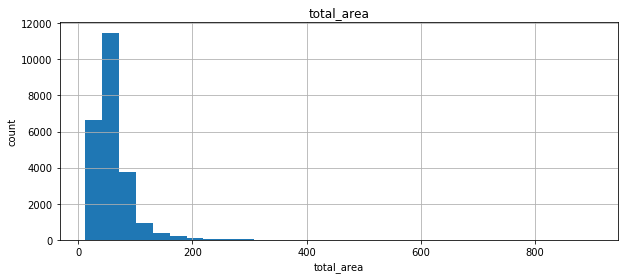

In [58]:
# построим гистограмму по общей площади
ax = real_estate['total_area'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='total_area')
ax.set(xlabel="total_area", ylabel="count")
plt.show()

После 200 кв м, столцов практически не видно, значит квартир с площадью от 200 кв м и больше очень мало.
Дополнительно посмотрим в диапазоне от 0 до 200 кв. м. и разбить на 20 корзин

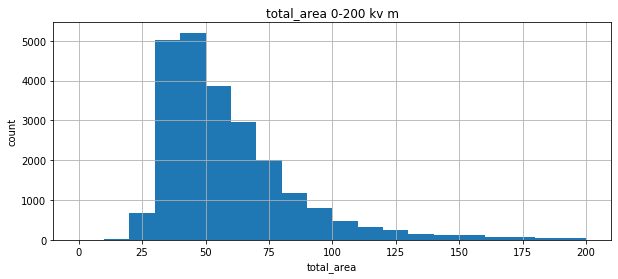

In [59]:
# построим гистограмму по общей площади в диапазоне от 0 до 200 кв м
ax = real_estate['total_area'].plot(kind='hist', bins=20, figsize=(10, 4), range=(0, 200), grid=True, title='total_area 0-200 kv m')
ax.set(xlabel="total_area", ylabel="count")
plt.show()

In [60]:
# посмотрим на цену
real_estate['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

У нас очень отличаются среднее и медиана, т.к. у нас 75% значений до 7 млн, а максимальное значение анамально большое и равно 763 млн. На гистограмме будет большой хвост, и скорее всего ничего не будет видно.

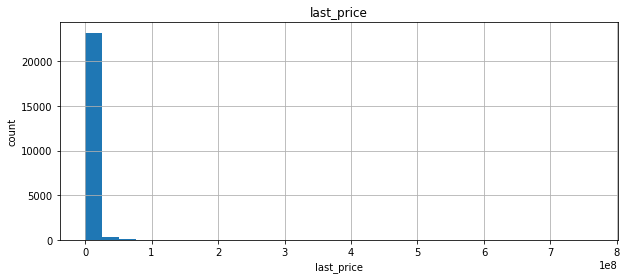

In [61]:
ax = real_estate['last_price'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='last_price')
ax.set(xlabel="last_price", ylabel="count")
plt.show()

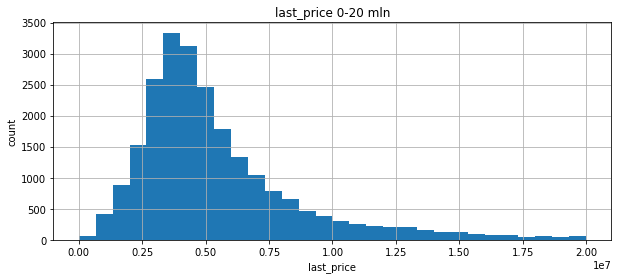

In [62]:
# посмотрим сразу с диапазоном до 20 млн
ax = real_estate['last_price'].plot(kind='hist', bins=30, figsize=(10, 4), range=(0, 20000000), grid=True, title='last_price 0-20 mln')
ax.set(xlabel="last_price", ylabel="count")
plt.show()

In [63]:
# посмотрим на кол-во комнат
real_estate['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Все как обычно, у нас  есть выбросы, например макисмальное значение 19 комнат является анамально большим

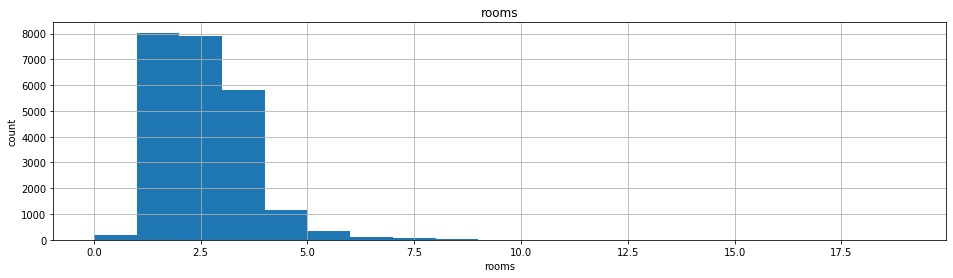

In [64]:
# кол-во корзин возьмем как максимально значение, чтобы видеть каждый столбец отдельно
ax = real_estate['rooms'].plot(kind='hist', bins=19, figsize=(16, 4), grid=True, title='rooms')
ax.set(xlabel="rooms", ylabel="count")
plt.show()

На гистограмме мы видим что основная масса объявлений с 1-2 комантными квартирами, чуть меньше 3х комнатных квартир. Студии и квартиры с 4+ комнатами в меньшем кол-ве.

In [65]:
# посмотрим на высоту потолков
real_estate['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Медина и среднее значение примерно похожи, несмотря на наличие объявлений с максимальой высотой потолков 100 м. Что будет сильно мешать нам на гистограмме.

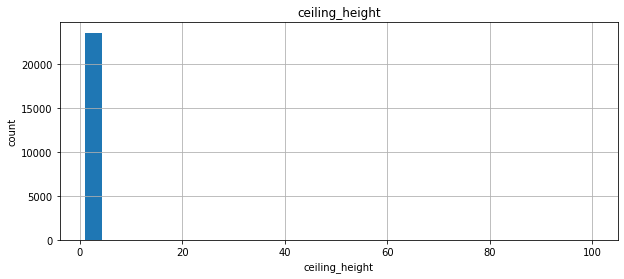

In [66]:
# посмотрим на гистограмму
ax = real_estate['ceiling_height'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='ceiling_height')
ax.set(xlabel="ceiling_height", ylabel="count")
plt.show()

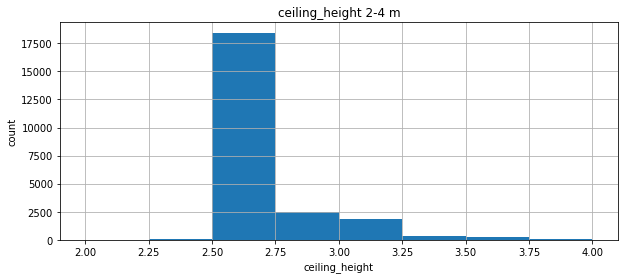

In [67]:
# посмотрим в диапазоне от 2 до 4 м и кол-во корзин возьмем 8
ax = real_estate['ceiling_height'].plot(kind='hist', bins=8, figsize=(10, 4), range=(2, 4), grid=True, title='ceiling_height 2-4 m')
ax.set(xlabel="ceiling_height", ylabel="count")
plt.show()

Один пик в диапазоне от 2.5 до 2.75 м - это самая часто встречающаяся высота потолков

#### 4.2 Изучите время продажи квартиры. 
- Постройте гистограмму. 
- Посчитайте среднее и медиану. 
- Опишите, сколько обычно занимает продажа. 
- Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

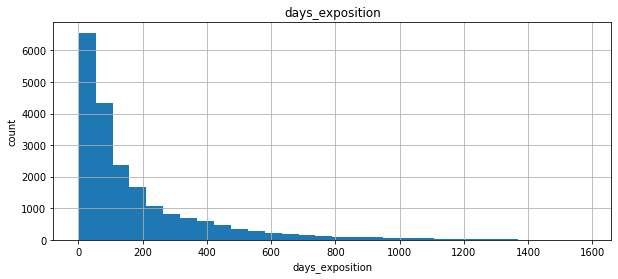

In [68]:
# построим гистограмму
ax = real_estate['days_exposition'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='days_exposition')
ax.set(xlabel="days_exposition", ylabel="count")
plt.show()

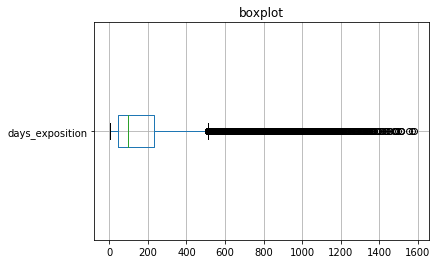

In [69]:
# посмотрим на диаграмму размаха
ax = real_estate.boxplot(column=['days_exposition'], vert=False)
plt.title('boxplot')
plt.show()

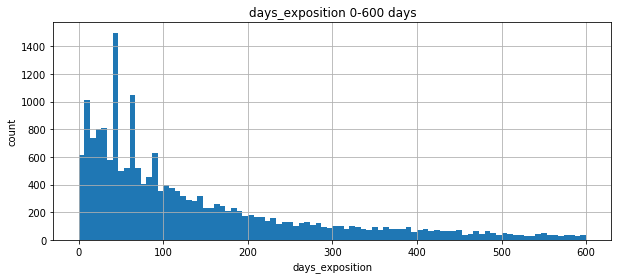

In [70]:
# и построим гистограмму в диапазоне от 0 до 600 дней (все что нам интересно из диаграммы размаха)
ax = real_estate['days_exposition'].plot(kind='hist', bins=90, figsize=(10, 4), range=(0, 600), grid=True, title='days_exposition 0-600 days')
ax.set(xlabel="days_exposition", ylabel="count")
plt.show()

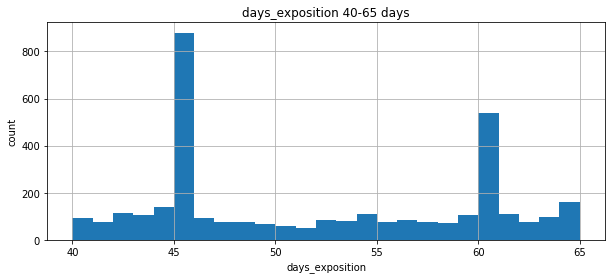

In [71]:
# на гистограмме видны аномалии, посмотрим детальнее диапазон с 40 по 65 дней и 25 корзин
ax = real_estate['days_exposition'].plot(kind='hist', bins=25, figsize=(10, 4), range=(40, 65), grid=True, title='days_exposition 40-65 days')
ax.set(xlabel="days_exposition", ylabel="count")
plt.show()

На 45-ый день и на 60-ый день приходится явно много значений. Вероятно это какой период после которого обьявления автоматичские снимаются с размещения. Эти данные нам могут сильно мешать, но все же мы их оставим, т.к. квартиры уже могли быть проданы, а данных по точной дате продажи у нас тоже нет, а так хоть что-то есть.

In [72]:
# посмотрим основные статистические показатели кол-ва дней объявления
real_estate['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана 95 дней, а среднее кол-во 180 дней. На среднее сильно влияют большие значения, хоть их и меньше.
Продажи обычно занимают от 45 до 230 дней. Отклонения в меньшую или большую сторону можно считать необычно быстрыми или долгими продажами

#### 4.3 Уберите редкие и выбивающиеся значения. 
Опишите, какие особенности обнаружили.

In [73]:
real_estate.describe()

,rooms,balcony,total_area,living_area,kitchen_area,floor,floors_total,days_exposition,last_price,total_images,ceiling_height,city_centers_nearest,parks_nearest,ponds_nearest,airports_nearest,parks_around3000,ponds_around3000,price_per_meter,weekday_exposition,month_exposition,year_exposition,living_area_ratio,kitchen_area_ratio
count,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,18264.000000,17652.000000,18156.000000,18264.000000,23650.000000,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000
mean,2.070106,0.591712,60.329069,34.612450,10.471450,5.893277,10.673784,180.753200,6.541127e+06,9.862326,2.724311,14238.311761,475.966321,509.419751,28873.682435,0.469091,0.590359,9.943225e+04,2.568710,6.401564,2017.370021,0.565727,0.185082
std,1.078620,0.959662,35.661808,22.386704,6.076212,4.883317,6.593455,219.777916,1.089640e+07,5.682278,0.989255,8624.455713,235.650384,200.356069,12680.037208,0.748458,0.883539,5.033793e+04,1.788808,3.491418,1.037806,0.101122,0.071019
min,0.000000,0.000000,12.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.219000e+04,0.000000,1.000000,181.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.120000e+02,0.000000,1.000000,2014.000000,0.021583,0.000000
25%,1.000000,0.000000,40.000000,19.000000,7.000000,2.000000,5.000000,45.000000,3.400000e+06,6.000000,2.600000,9289.000000,428.500000,462.000000,18625.000000,0.000000,0.000000,7.661500e+04,1.000000,3.000000,2017.000000,0.500000,0.136267
50%,2.000000,0.000000,52.000000,30.000000,9.000000,4.000000,9.000000,95.000000,4.650000e+06,9.000000,2.650000,13107.000000,460.000000,503.000000,26757.500000,0.000000,0.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.576923,0.175000
75%,3.000000,1.000000,69.700000,42.115385,12.000000,8.000000,16.000000,231.000000,6.799000e+06,14.000000,2.700000,16318.250000,460.000000,561.000000,37348.000000,1.000000,1.000000,1.142740e+05,4.000000,10.000000,2018.000000,0.631579,0.223773
max,19.000000,5.000000,900.000000,409.700000,112.000000,33.000000,60.000000,1580.000000,7.630000e+08,50.000000,100.000000,65968.000000,3190.000000,1344.000000,84869.000000,3.000000,3.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


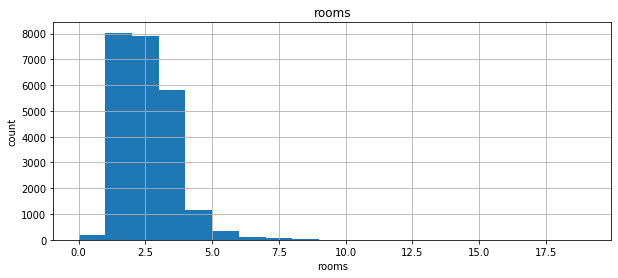

In [74]:
# посмотрим детальнее на кол-во комнат
ax = real_estate['rooms'].plot(kind='hist', bins=19, figsize=(10, 4), grid=True, title='rooms')
ax.set(xlabel="rooms", ylabel="count")
plt.show()

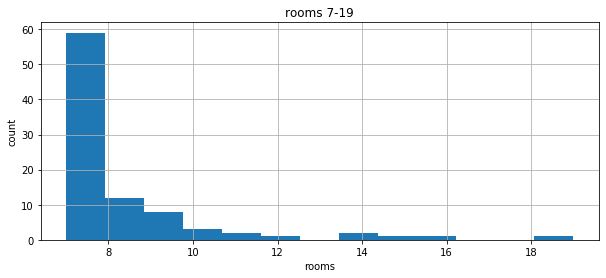

In [75]:
# посмотрим детальнее на кол-во комнат в диапазоне от 7 до 19
ax = real_estate['rooms'].plot(kind='hist', bins=13, figsize=(10, 4), range=(7, 19), grid=True, title='rooms 7-19')
ax.set(xlabel="rooms", ylabel="count")
plt.show()

In [76]:
# посмотрим на квартиры с 14+ комнатами, посчитаем среднюю площадь комнаты
real_estate_selected2 = real_estate.query('rooms >= 14')
real_estate_selected2['room_area'] = real_estate_selected2['living_area'] / real_estate_selected2['rooms']
real_estate_selected2[['locality_name','last_price', 'rooms', 'living_area', 'room_area']].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,locality_name,last_price,rooms,living_area,room_area
866,Санкт-Петербург,25000000,14,222.0,15.857143
5349,Санкт-Петербург,65000000,15,409.0,27.266667
14473,Санкт-Петербург,32250000,19,264.5,13.921053
18815,Санкт-Петербург,28500000,16,180.0,11.250000
20789,Санкт-Петербург,28659000,14,168.3,12.021429


Можно сказать, что 4 варианта из 5 это какие-то гостинницы или хостелы :) Думаю все равно стоит убрать всех 5 вариантов



In [77]:
# больше 7 комнат уже на гистограмме почти не видно, поэтому отсечем их
real_estate_clear = real_estate.query('rooms < 14')

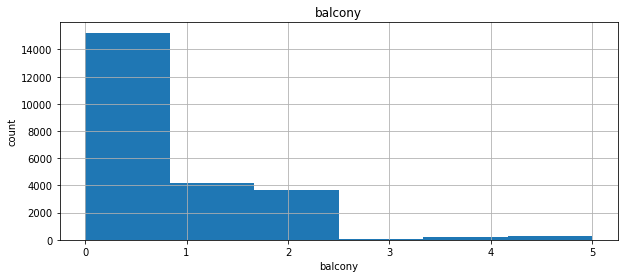

In [78]:
# построим гистограмму кол-ва балконов
ax = real_estate_clear['balcony'].plot(kind='hist', bins=6, figsize=(10, 4), grid=True, title='balcony')
ax.set(xlabel="balcony", ylabel="count")
plt.show()

In [79]:
# посмотрим сначала на такой вариант, когда в квартире может быть балконов больше чем кол-во комнат + кухня.
real_estate_clear.query('balcony > rooms + 1')

,locality_name,rooms,balcony,total_area,living_area,kitchen_area,floor,floors_total,first_day_exposition,days_exposition,last_price,total_images,ceiling_height,is_apartment,is_studio,is_open_plan,city_centers_nearest,parks_nearest,ponds_nearest,airports_nearest,parks_around3000,ponds_around3000,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
41,Санкт-Петербург,3,5,74.00,59.000000,12.000,8,14,2016-05-04,179.0,7900000,16,2.65,False,False,False,12612.0,725.0,759.0,37715.0,1,1,106757,2,5,2016,другой,0.797297,0.162162
116,Санкт-Петербург,3,5,97.20,56.076923,18.300,16,16,2017-11-13,394.0,10999000,18,2.50,False,False,False,21138.0,460.0,390.0,19426.0,0,2,113158,0,11,2017,последний,0.576923,0.188272
144,посёлок Мурино,0,2,27.00,15.500000,0.000,2,24,2017-03-30,181.0,2450000,1,2.65,False,True,False,NaN,NaN,NaN,NaN,0,0,90741,3,3,2017,другой,0.574074,0.000000
250,Всеволожск,2,4,51.70,29.200000,7.700,5,16,2019-01-22,21.0,3200000,13,2.65,False,False,False,NaN,NaN,NaN,NaN,0,0,61896,1,1,2019,другой,0.564797,0.148936
263,Санкт-Петербург,2,4,140.60,39.800000,49.200,7,8,2016-11-19,NaN,39900000,12,3.50,False,False,False,6589.0,460.0,99.0,32537.0,0,3,283784,5,11,2016,другой,0.283073,0.349929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23448,Санкт-Петербург,2,4,55.40,29.400000,9.600,16,20,2019-04-22,NaN,6150000,17,2.80,False,False,False,13873.0,460.0,481.0,16285.0,0,1,111011,0,4,2019,другой,0.530686,0.173285
23477,Санкт-Петербург,3,5,60.69,39.700000,6.200,2,9,2018-03-13,30.0,5800000,14,2.50,False,False,False,15954.0,460.0,503.0,51239.0,0,0,95568,1,3,2018,другой,0.654144,0.102159
23500,Санкт-Петербург,3,5,184.00,55.700000,24.500,19,19,2016-04-21,205.0,19600000,5,3.00,False,False,False,4837.0,460.0,503.0,18995.0,0,0,106522,3,4,2016,последний,0.302717,0.133152
23543,Никольское,0,2,29.00,18.000000,5.075,8,9,2017-11-11,82.0,1450000,10,2.65,False,False,True,NaN,NaN,NaN,NaN,0,0,50000,5,11,2017,другой,0.620690,0.175000


In [80]:
# отсечем квартиры где балконов больше чем кол-во комнат + 1 (кухня).
real_estate_clear = real_estate_clear.query('balcony <= rooms + 1')

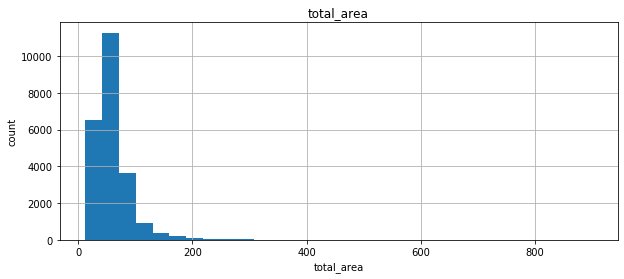

In [81]:
# построим гистограмму общей площади
ax = real_estate_clear['total_area'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='total_area')
ax.set(xlabel="total_area", ylabel="count")
plt.show()

In [82]:
# отсечем квартиры с площадью больше 200 кв м
real_estate_clear = real_estate_clear.query('total_area < 200')

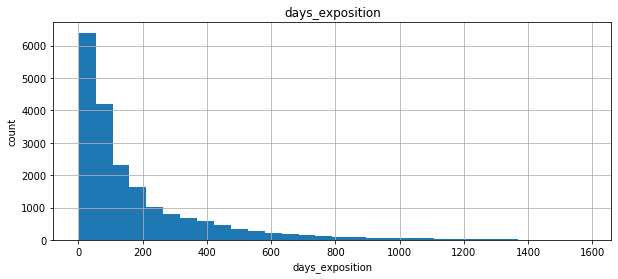

In [83]:
# построим гистограмму кол-ва дней
ax = real_estate_clear['days_exposition'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='days_exposition')
ax.set(xlabel='days_exposition', ylabel='count')
plt.show()

In [84]:
# отсечем квартиры с объявлениея больше 1000 дней
real_estate_clear = real_estate_clear.query('days_exposition < 1000')

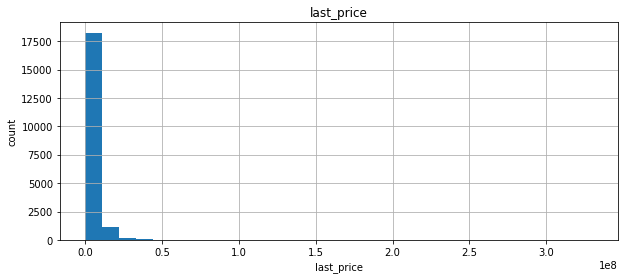

In [85]:
# построим гистограмму цены
ax = real_estate_clear['last_price'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='last_price')
ax.set(xlabel='last_price', ylabel='count')
plt.show()

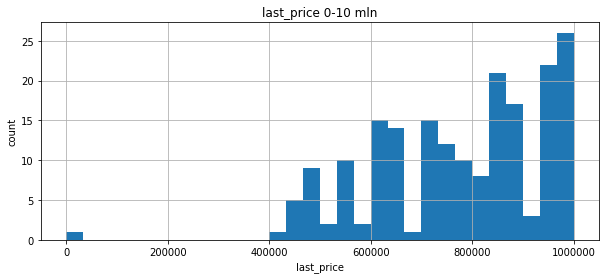

In [86]:
# и детальнее посмотрим первые млн
ax = real_estate_clear['last_price'].plot(kind='hist', bins=30, figsize=(10, 4), range=(0, 1000000), grid=True, title='last_price 0-10 mln')
ax.set(xlabel='last_price', ylabel='count')
plt.show()

In [87]:
# отсечем квартиры с ценой до 400 тыс и ценой больше 20 млн
real_estate_clear = real_estate_clear.query('last_price >= 400000 and last_price < 20000000')

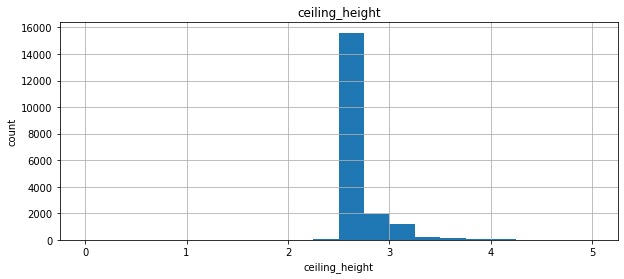

In [88]:
# построим гистограмму высоты с диапазоном от 0 до 5 м
ax = real_estate_clear['ceiling_height'].plot(kind='hist', bins=20, figsize=(10, 4), range=(0, 5), grid=True, title='ceiling_height')
ax.set(xlabel='ceiling_height', ylabel='count')
plt.show()

In [89]:
# отсечем квартиры с высотой потолков до 2 м и выше 5
real_estate_clear = real_estate_clear.query('ceiling_height >= 2 and ceiling_height < 5')

In [90]:
# и посмотрим на сколько порядела наша выборка относительно изначальной
(real_estate.shape[0], real_estate_clear.shape[0])

(23650, 19276)

**Вывод**

Мы изучили площади квартир, цены, кол-во комнат и высоту потолков.

Выяснили, что 75% объявлений с квартирами до 70 кв. м.,но при этом максимально размер 900 кв м. Квартир с площадью больше 200 кв м очень мало.

Узнали что цена 75% квартир до 7 млн. А самая дорогая квартира 763 млн.

Основная масса объявлений с 1-2 комантными квартирами, чуть меньше 3х комнатных квартир. Студии и квартиры с 4+ комнатами в меньшем кол-ве.

Самая часто встречающаяся высота потолков находится в диапазоне от 2.5 до 2.75 м.

Продажи обычно занимают от 45 до 230 дней. В среднем 95 дней.

Убрали выбросы и анамалии в виде 14-19 комнатных квартир, квартир с 4-5 балконами, с площадью больше 200 кв м, ценой 12000 и ценой больше 20 млн, а так же высотой потолков меньше 2х метров и больше 5.

#### 4.4 Какие факторы больше всего влияют на стоимость квартиры? 
- Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. 
- Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
- Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [91]:
real_estate_clear[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.770407,0.506199,-0.363717
total_area,0.770407,1.000000,0.803133,-0.201476
rooms,0.506199,0.803133,1.000000,-0.142851
city_centers_nearest,-0.363717,-0.201476,-0.142851,1.000000


Цена зависит в первую очередь от общей площади (0.77). А так же цена отрицательно коррелирует с удаленностью от центра, что логично.

In [92]:
# посмотрим на зависимость цены от этажности
real_estate_clear.pivot_table(index='floor_category', values='last_price', aggfunc=['count', 'median', 'mean'])

,count,median,mean
,last_price,last_price,last_price
floor_category,,,
другой,14191,4600000,5.424217e+06
первый,2384,3799500,4.197981e+06
последний,2701,4160000,4.972312e+06


- Квартиры с первого этажа имеют самую низкую стоимость по медиане и по среднему значению. 
- Квартиры с последнего этажа немного выше оцениваются.
- Оставшиеся квартиры имеют самую высокую цену как по медиане так и по среднему значению. Стоит так же учитывать что таких квартир во много раз больше.

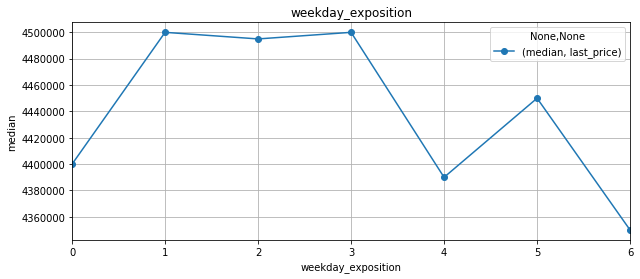

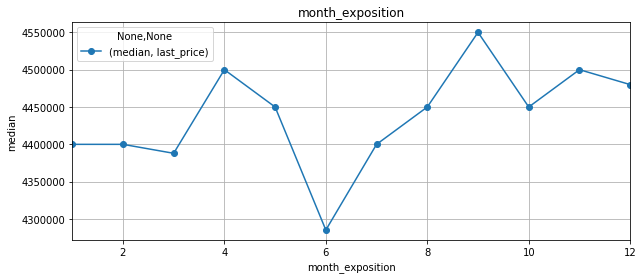

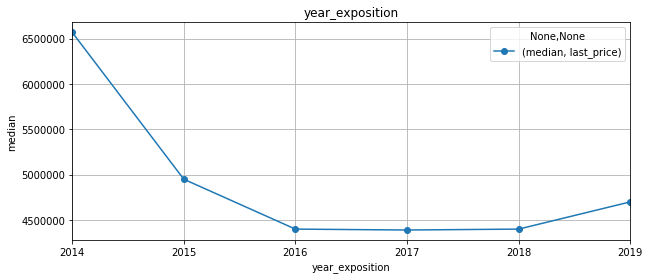

In [93]:
# посмотрим на зависимость цены даты размещения
def exposition_plot(df, index):
    ax = df.pivot_table(index=index, values='last_price', aggfunc=['median']).plot(style='o-', figsize=(10, 4), grid=True, title=index)
    ax.set(xlabel=index, ylabel='median')
    plt.show()

for index in ['weekday_exposition', 'month_exposition', 'year_exposition']:
    exposition_plot(real_estate_clear, index)

Можно сказать, что в начале недели и в конце размещаются самые дешенвые варианты, а самые дорогие варианты размещаются во вторник и среду.
По месяцам ведино самыые дорогие варианты размещаются в сентябре, а самые дешевые варианты в июне.
По годам видно, как стоимость жилья падала с 2014 по 2017 год, последние 2 года стоимость немного росла.

#### 4.5 Выберите 10 населённых пунктов с наибольшим числом объявлений. 
- Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
- Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

Эти данные можно найти по имени в столбце 'locality_name'.

In [94]:
# выберем топ 10 населенных пунктов по кол-ву объявлений
top10 = real_estate_clear['locality_name'].value_counts().sort_values(ascending=False).head(10)
top10

Санкт-Петербург      12669
посёлок Мурино         489
посёлок Шушары         398
Всеволожск             326
посёлок Парголово      299
Колпино                298
Пушкин                 294
деревня Кудрово        282
Гатчина                258
Выборг                 207
Name: locality_name, dtype: int64

In [95]:
# посчитаем среднюю цену квадратного метра
locality_price_median = (
    real_estate_clear.query('locality_name in @top10.index')
    .groupby('locality_name')['price_per_meter']
    .median()
    .sort_values(ascending=False)
)

locality_price_median

locality_name
Санкт-Петербург      102083.0
Пушкин                97725.5
деревня Кудрово       91930.0
посёлок Парголово     91429.0
посёлок Мурино        85714.0
посёлок Шушары        76439.0
Колпино               73356.0
Гатчина               67123.5
Всеволожск            65737.5
Выборг                56944.0
Name: price_per_meter, dtype: float64

Квартиры с самой высокой стоимостью находятся в Санкт-Петербурге, что не удивительно, а с самой низкой стоимостью в Выборге.

#### 4.6 Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
Выделите квартиры в Санкт-Петербурге ('locality_name'). 

Ваша задача — выяснить, какая область входит в центр. 

- Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
- После этого посчитайте среднюю цену для каждого километра. 
- Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
- Определите границу, где график сильно меняется — это и будет центральная зона.

In [96]:
# выберем все объявления из Санкт-Петербурга
piter = real_estate_clear.query('locality_name == "Санкт-Петербург"')

In [97]:
# запишем в новый столбец расстояние подерленное на 1000
piter['city_centers_nearest_km'] = (piter['city_centers_nearest'] / 1000).round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
# посчитаем медиану стоимости каждого километра
piter_km_price = piter.groupby('city_centers_nearest_km')['last_price'].median()
piter_km_price

city_centers_nearest_km
0.0     8795000
1.0     9675000
2.0     8900000
3.0     7600000
4.0     8340000
5.0     8150000
6.0     7500000
7.0     6525000
8.0     6520000
9.0     5100000
10.0    4800000
11.0    4800000
12.0    4800000
13.0    5055000
14.0    4700000
15.0    4700000
16.0    4600000
17.0    4500000
18.0    4199000
19.0    4300000
20.0    5225000
21.0    4850000
22.0    4650000
23.0    4270000
24.0    3610000
25.0    3794881
26.0    3310000
27.0    8300000
28.0    4990000
29.0    4370000
Name: last_price, dtype: int64

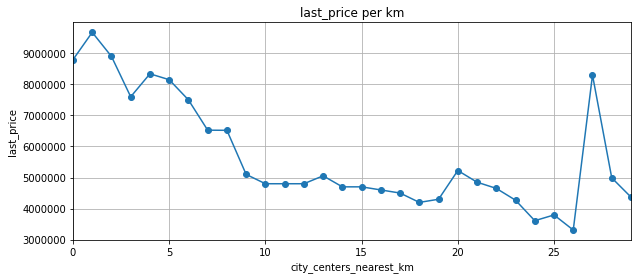

In [99]:
ax = piter_km_price.plot(style='o-', figsize=(10, 4), grid=True, title='last_price per km')
ax.set(xlabel='city_centers_nearest_km', ylabel='last_price')
plt.show()

На графике видно как стоимость каждого последующего км уменьшается, кроме резкого всплеска в конце графика.
Примерно после 7-8 км идет резкий спад стоимости, будем считать это центральная зона.

#### 4.7 Выделите сегмент квартир в центре. 
- Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
- Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
- Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [100]:
# как выяснили ранее центральная зона у нас до 8 км
piter_center = piter.query('city_centers_nearest_km < 8')

In [101]:
# посмотрим на основные статистические показатели центра
piter_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,2431.000000,2.431000e+03,2431.000000,2431.000000
mean,74.589671,8.747912e+06,2.534348,2.890753
std,30.687855,3.626710e+06,1.153431,0.330961
min,12.000000,1.600000e+06,0.000000,2.400000
25%,51.000000,6.025000e+06,2.000000,2.650000
50%,70.000000,8.000000e+06,2.000000,2.710000
75%,91.750000,1.090000e+07,3.000000,3.085000
max,197.200000,1.999900e+07,7.000000,4.800000


In [102]:
# посмотрим на основные статистические показатели всего города
piter[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,12669.000000,1.266900e+04,12669.000000,12669.000000
mean,57.702904,6.145669e+06,2.035836,2.700116
std,24.317759,3.064998e+06,0.983112,0.211147
min,12.000000,1.190000e+06,0.000000,2.000000
25%,40.500000,4.050000e+06,1.000000,2.600000
50%,51.500000,5.200000e+06,2.000000,2.650000
75%,69.000000,7.200000e+06,3.000000,2.700000
max,199.200000,1.999900e+07,7.000000,4.800000


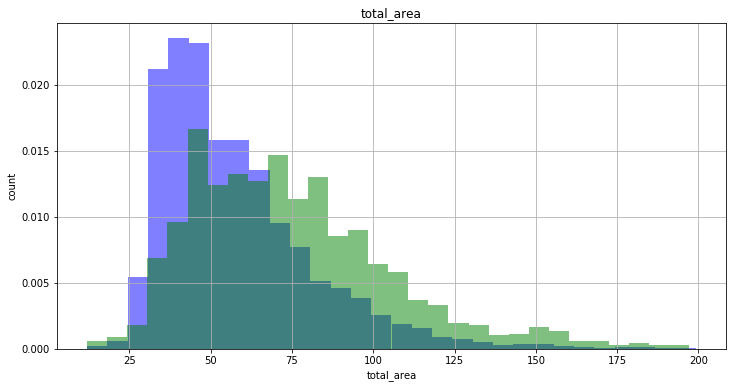

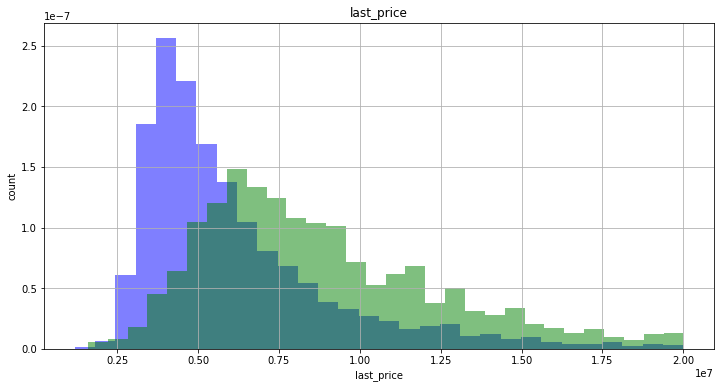

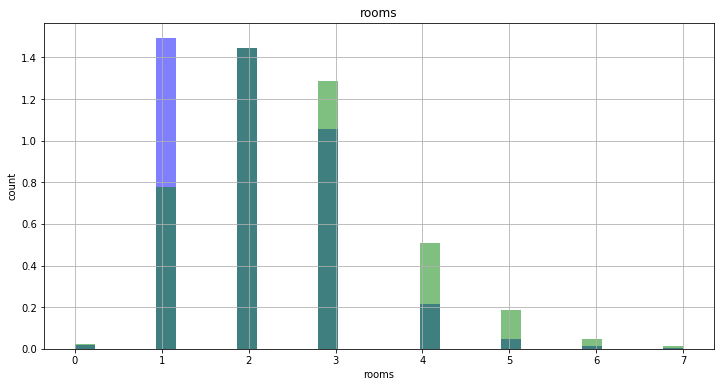

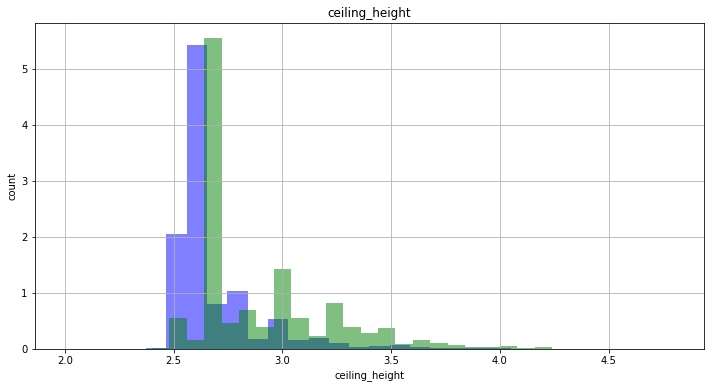

In [103]:
# сделаем функцию для отрисовки гистограмм
def piter_vs_center(column):
    plt.figure(figsize=(12,6))
    piter[column].plot(kind='hist', bins=30, color='b', grid=True, alpha=0.5, density=True)
    piter_center[column].plot(kind='hist', bins=30, color='g', grid=True, alpha=0.5, density=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()

for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    piter_vs_center(column)

В отличии от всего Санкт-Петербурга, в центре города площадь от 40 до 75 кв м это основное кол-во квартир. Медиана площади практически не отличается в центре и во всем городе, а вот среднее значение в центре 74 кв м против 57 кв м во всем городе, это означает что в центре квартиры по общей площади более равномерно представлены, нет перекоса в сторону квартир с меньшей площалью, что видно на совмещенной гистограмме.

Тоже самое и с ценой. Среднее и медиана значительно больше в центре.

Кол-во комнат так же отличается, в центре представлено больше 2-3 комнатных квартир, а во всем городе большинство же за 1-2 комнатными квартирами.

Высота потолков точно так же в центре выше чем во всем городе.

In [104]:
# посмотрим на зависимость цены в центре 
piter_center[['last_price', 'rooms', 'city_centers_nearest']].corr()

,last_price,rooms,city_centers_nearest
last_price,1.000000,0.481926,-0.141371
rooms,0.481926,1.000000,-0.209342
city_centers_nearest,-0.141371,-0.209342,1.000000


Матрица корреляции говорит о том что кол-во комнат влияет немного на стоимость жилья, а вот растояние от центра обратно влияет на стоимость, что тоже логично и ожидаемо.

In [105]:
piter.pivot_table(index='rooms', values='last_price', aggfunc=['median'])

,median
,last_price
rooms,
0,3200000
1,4000000
2,5450000
3,6750000
4,8750000
5,11500000
6,13000000
7,13700000


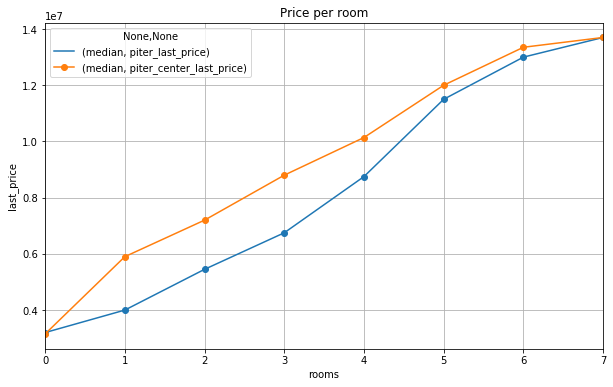

In [106]:
# Посмотрим на график по кол-ву комнат и стоимости, чтобы убедиться
ax = (
    piter
    .pivot_table(index='rooms', values='last_price', aggfunc=['median'])
    .rename(columns={'last_price': 'piter_last_price'})
    .plot(style='o-', figsize=(10, 6), grid=True)
)
ax2 = (
    piter_center
    .pivot_table(index='rooms', values='last_price', aggfunc=['median'])
    .rename(columns={'last_price': 'piter_center_last_price'})
    .plot(ax=ax, style='o-', figsize=(10, 6), grid=True)
)
plt.xlabel('rooms')
plt.ylabel('last_price')
plt.title('Price per room')
plt.show()

In [107]:
# посмотрим на зависимость цены в центре от этажности
piter_center.pivot_table(index='floor_category', values='last_price', aggfunc=['count', 'median', 'mean'])

,count,median,mean
,last_price,last_price,last_price
floor_category,,,
другой,1709,8326824,9.081248e+06
первый,295,6100000,6.883591e+06
последний,427,8000000,8.701784e+06


В целом ничего не меняется, в центре тоже первые и последний этаж стоят дешевле.

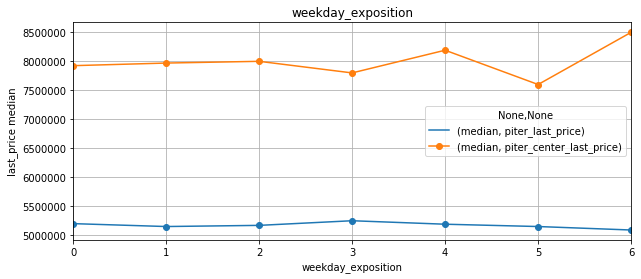

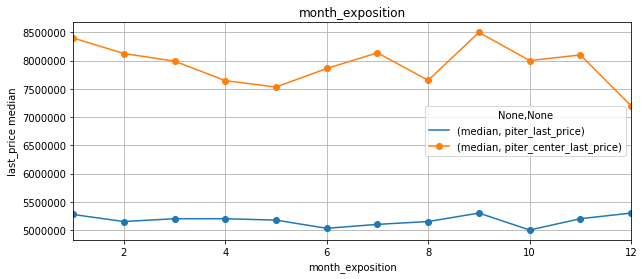

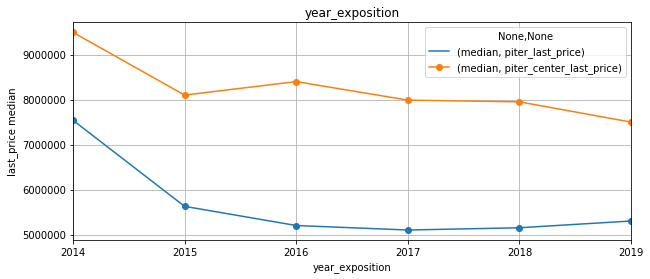

In [108]:
# посмотрим на зависимость цены даты размещения
def exposition_plot_vs(piter_df, piter_center_df, index):
    ax = (
        piter_df
        .pivot_table(index=index, values='last_price', aggfunc=['median'])
        .rename(columns={'last_price': 'piter_last_price'})
        .plot(style='o-', figsize=(10, 4), grid=True)
    )
    ax2 = (
        piter_center_df
        .pivot_table(index=index, values='last_price', aggfunc=['median'])
        .rename(columns={'last_price': 'piter_center_last_price'})
        .plot(ax=ax, style='o-', figsize=(10, 4), grid=True)
    )
    plt.xlabel(index)
    plt.ylabel('last_price median')
    plt.title(index)
    plt.show()
    
# посмотрим на зависимость цены даты размещения, функция у нас уже была написана ранее
for index in ['weekday_exposition', 'month_exposition', 'year_exposition']:
    exposition_plot_vs(piter, piter_center, index)

В зависимости от дня недели в центре немного другая ситация, воскресенье и пятница лидеры по размещению в эти дни самых дорогих вариантов.

Январь и сентябрь стали самыми поппулярными месяцами для размещения дорогих квартир, а декабрь оказался самым популярным по размещению дешевых вариантов. Можно наблюдать как в течении года стомость квартир падает и поднимается.

Последний график по годам показывает как сильно изменилась стоимость квартир в центре за последние 5 лет.

**Вывод**

Мы посчитали 

### Шаг 5. Общий вывод
<a id="step_5"></a>

#### 1. Исходные данные
В исходных данных 23699 строк и 22 столбца.

Очень большое кол-во пропусков, неоптимальных типов данных.

#### 2. Предобработка данных
В предообработке данных мы проделали следующие действия:

1) Сначала мы привели в порядок наименование столбцов, для удобной работы в дальнейшем.

2) Далее мы обработали пропуски:
- высоту потолков мы заполнили медианой
- признак апартаментов заполнили значением, хоть он нам и не понадобился
- кол-во балконов заполнили нолями, и он тоже нам не понадобился
- удалили строки без населенных пунктов
- удалили строки без указанных кол-ва этажей в доме
- заполнили кол-во парков и водоемов нолями т.к. не указаны билащие объекты
- посчтиали некий коффициент который определяет площзадь кухни отностиельно общей площади и заполнили площадь кухни соответствующей общей площадью умноженной этот коэффициент
- заполнили медианой в зависимости от населенного пункта рассстояние до центра
...

3) Заменили необходимые типы данных на нужные нам.

#### 3. Для дальнейшей работы нам необходимы были дополнительные параметры:
1) Мы посчитали стоимость квадратного метра каждой квартиры.
2) Мы определили день нелеи от даты размещения, а так же месяц и год
3) Мы категориизировали данные об этажах: первый, последний, другой
4) Мы посчитали соотношение жилой и общей площади, а также кухни и общей площади

#### 4. Исследовательский анализ
В рамках исследовательского анализа данных:
1) Мы изучили параметры объявлений: площадь, цена, число комнат, высота потолков. 
1.1) Узнали, что 75% объявлений с квартирами до 70 кв. м., при том что максимально значение 900 квм. Построили график.
1.2) У нас очень отличаются среднее и медиана стоимости квартир, т.к. у нас 75% значений до 7 млн, а максимальное значение анамально большое и равно 763 млн.
1.3) У нас есть выбросы в кол-ве комнат, например макисмальное значение 19 комнат является анамально большим

2) Изучили время продажи квартиры:
Продажи обычно занимают от 45 до 230 дней. Отклонения в меньшую или большую сторону это необычно быстрые или долгие продажи

3) Убрали редкие и выбивающиеся значения

4) Выясняли какие факторы больше всего влияют на стоимость квартиры
4.1) Цена зависит в первую очередь от общей площади (0.77). А так же цена отрицательно коррелирует с удаленностью от центра, что логично. Квартиры с первого этажа имеют самую низкую стоимость по медиане и по среднему значению.Квартиры с последнего этажа немного выше оцениваются. Оставшиеся квартиры имеют самую высокую цену как по медиане так и по среднему значению. Стоит так же учитывать что таких квартир во много раз больше.
4.2) Выбрали 10 населенных пунктовс наибольшим кол-во размещенных объявлений. Посчитали среднюю цену квадратного метра в каждом населенном пункте. И определили что в Санкт-Петербург самый высокая стоимость квадратного метра.
4.3) Выделили квартиры только из Санкт-Петербурга. Посчитали стоимость для каждого километра от центра. Примерно после 7-8 км идет резкий спад стоимости, будем считать это центральная зона.
4.4) Выделили центр Санкт-Петербурга. В отличии от всего Санкт-Петербурга, в центре города площадь от 40 до 75 кв м это основное кол-во квартир. В центре квартиры по общей площади более равномерно представлены, нет перекоса в сторону квартир с меньшей площалью, в центре представлено больше 2-3 комнатных квартир, а во всем городе большинство же за 1-2 комнатными квартирами. Высота потолков в центре выше чем во всем городе.
